In [1]:
import numpy as np
# importing matplotlib.pyplot package from
# python
import matplotlib.pyplot as plt


In [22]:
np.random.seed(42)

a = 2
b = 5

#y = ax + b


def genera_datos(ndatos):
# y = 1*x + 3
  #plt.plot([0, 10], [3, 13], color="r")
  x = np.linspace(0, 10, ndatos)
  y = x + 3 + np.random.randn(ndatos)
  return (x,y)

def predice(x):
  y_hat = a*x + b
  return y_hat

def error(x, y):
  y_hat = predice(x)
  err = y_hat - y
  return err

def calc_accuracy(x,y):
  y_med = y.mean()
  err = error(x,y)
  numerador = (err ** 2).sum()
  denominador = ((y - y_med) ** 2).sum()
  return 1 - numerador/denominador

def coste(x, y):
  c = error(x,y)
  c = c ** 2
  c = c.mean()
  return c

#2/n ∑(yi_hat -yi) * xi
def derivada_a(lx, ly):
  d = error(lx, ly)
  d = 2*d*lx
  d = d.mean()
  return d

#2/n ∑(yi_hat -yi)
def derivada_b(lx, ly):
  d = 2*error(lx, ly)
  d = d.mean()
  return d


def derivadaN_a(lx, ly):
  global a
  a_ini = a
  c_ini = coste(lx, ly)
  a = a + 0.001
  a_end = a
  c_end = coste(lx, ly)
  a = a - 0.001
  d = (c_end - c_ini)/(a_end - a_ini)
  return d

def derivadaN_b(lx, ly):
  global b
  b_ini = b
  c_ini = coste(lx, ly)
  b = b + 0.001
  b_end = b
  c_end = coste(lx, ly)
  b = b - 0.001
  d = (c_end - c_ini)/(b_end - b_ini)
  return d


def fit(lx, ly, batch_size, learning_rate, nepochs):
  global a
  global b
  nlotes = len(lx) // batch_size

  for epoch in range(nepochs):
    for lote in range(nlotes):
      inicio_lote = lote * batch_size
      final_lote = (lote+1) * batch_size
      derivada_respecto_a = derivada_a(lx[inicio_lote:final_lote], ly[inicio_lote:final_lote])
      derivada_respecto_b = derivada_b(lx[inicio_lote:final_lote], ly[inicio_lote:final_lote])
      a = a - learning_rate * derivada_respecto_a
      b = b - learning_rate * derivada_respecto_b
      la.append(a)
      lb.append(b)
      c = coste(lx, ly)
      c_test = coste(x_test, y_test)
      lc.append(c)
      m = calc_accuracy(lx, ly)
      m_test = calc_accuracy(x_test, y_test)
      lm.append(m)
      print(f"epoch: {epoch} loss: {c:.03} loss_test: {c_test:.03}  acc: {m:.03}  acc_test: {m_test:.03}  a: {a}  b: {b}")
  print("")
 




epoch: 0 loss: 41.1 loss_test: 40.5  acc: -3.25  acc_test: -3.69  a: 1.8037858374659388  b: 4.8617348126339754
epoch: 0 loss: 4.85 loss_test: 4.5  acc: 0.498  acc_test: 0.478  a: 1.0575289948499984  b: 4.667610735568013
epoch: 0 loss: 3.3 loss_test: 3.33  acc: 0.658  acc_test: 0.614  a: 0.5380578112063786  b: 4.584938100244697
epoch: 0 loss: 17.6 loss_test: 17.2  acc: -0.825  acc_test: -0.988  a: 1.4376068553277213  b: 4.686924409573192
epoch: 1 loss: 11.4 loss_test: 11.0  acc: -0.18  acc_test: -0.274  a: 1.3027380993823954  b: 4.588877988627196
epoch: 1 loss: 1.94 loss_test: 1.77  acc: 0.799  acc_test: 0.795  a: 0.8887766315484389  b: 4.480699453842558
epoch: 1 loss: 1.83 loss_test: 1.81  acc: 0.81  acc_test: 0.79  a: 0.6838357420854155  b: 4.447733760704931
epoch: 1 loss: 7.05 loss_test: 6.72  acc: 0.271  acc_test: 0.221  a: 1.1800733784558286  b: 4.504076084944882
epoch: 2 loss: 4.28 loss_test: 4.03  acc: 0.557  acc_test: 0.533  a: 1.0752405828876102  b: 4.426026150116403
epoch: 2 l

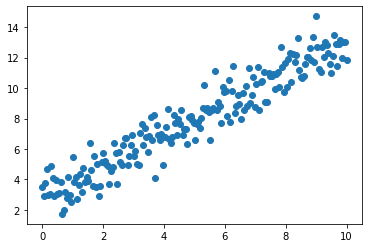

In [23]:

lx, ly = genera_datos(200)
plt.scatter(lx, ly)

# plt.plot([0, 10 ], [5, 25])

#predice(4)
# coste(lx, ly)

la=[]
lb=[]
lc=[]
lm=[]
learning_rate = 0.02
nepochs = 150
batch_size = 50

x_test, y_test = genera_datos(40)
fit(lx, ly, batch_size, learning_rate, nepochs)
a = la[-1]
b = lb[-1]
c = lc[-1]
acc = lm[-1]
print("Datos entrenamiento")
print(f"loss: {c:.03}  accuracy: {acc:.03}  a: {a}  b: {b}")


c2 = coste(x_test, y_test)
acc2 = calc_accuracy(x_test, y_test)
print("Datos de test")
print(f"loss: {c2:.03}  accuracy: {acc2:.03}")

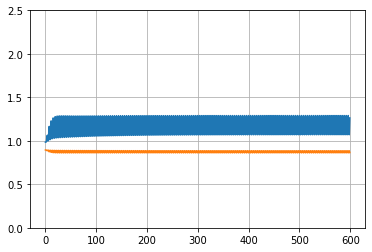

In [14]:
plt.plot(range(len(lc)), lc)
plt.plot(range(len(lc)), lm)
plt.ylim(0,2.5)
plt.grid(True)

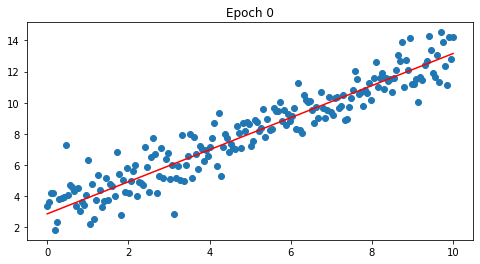

In [15]:

from matplotlib import animation
from matplotlib import rc

rc("animation", html="html5")

fig = plt.figure(figsize=(8,4))
ax = plt.subplot()

ax.scatter(lx, ly)

#ax.set_xlim(0,2)
#ax.set_ylim(-2,2) #, ax.set_xlabel, ....
txt_title = ax.set_title("Regresión")
l1, = ax.plot([], [], "r")

def dibuja(n):
  a1 = la[n] 
  b1 = lb[n] 
  x1 = [0, 10]
  y1 = [b1, 10*a1 + b1]
  txt_title.set_text(f"Epoch {n}")
  l1.set_data(x1, y1)
  return (l1,)

anim = animation.FuncAnimation(fig, dibuja, frames=len(la)-1, interval=50)
anim

(20,) (20,)


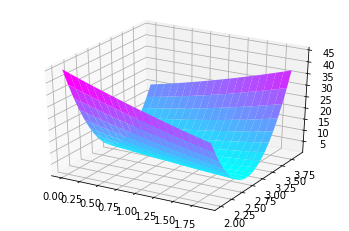

In [25]:
Xa1 = np.arange(0, 2,0.1)

Yb1 = np.arange(2, 4, 0.1)


print(Xa1.shape, Yb1.shape)
Xa, Yb = np.meshgrid(Xa1, Yb1)
#Yb, Xa = np.meshgrid(Xa1, Yb1)
# print(Xa, Yb)
Z = np.zeros((20,20))
for i in range(20):
  for j in range(20):
    a = Xa1[i]
    b = Yb1[j]
    Z[i][j] = coste(lx, ly)
#print(Z)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(Xa, Yb, Z, cmap = 'cool', antialiased=True)
#surf = ax.plot_wireframe(Xa, Yb, Z)
#plt.pcolor(Xa, Yb, Z, edgecolors='k', linewidths=2)